In [8]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [12]:
import struct                                                                                                    
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pandas as pd
import pylab as pl

import os
import glob

cal_files = glob.glob('/home/gsilvest/Work/Dec2019_FOOT_data/HF000T/draft/*.cal')
filename = '/home/gsilvest/Work/Dec2019_FOOT_data/HF000T/txt/data/HF000T_PL_007.dat.csv'
delta_times = np.array(list(map(lambda x : os.path.getctime(x), cal_files))) - os.path.getctime(filename)


data = np.loadtxt(filename, dtype="float", delimiter=",")

In [14]:
# data = np.delete(data,9243,0)

In [8]:
def clusterize(data, highThresh, lowThresh, symmetric = False, symmetric_width = 1):
    
    maxClusters = 10
    col_names =  ['evt', 'nclust', 'seed', 'signal', 'width', 'address', 'cog']
    CLUSTERS  = pd.DataFrame(columns = col_names)
    CLUSTERS

    for cnt, event in enumerate(data):
        print("Clustering event {0}".format(cnt), end='\r')
        seeds = np.where(event > high_threshold)[0] # candidate seed strips over high threshold
        if np.size(seeds) > maxClusters:
            continue
        seeds = np.delete(seeds,np.where(np.diff(seeds)==1)[0]) # remove adjacent strips over threshold (to prevent counting same cluster 2 times)    
        if not(np.size(seeds) == 0):
            nclust = np.size(seeds)
            for seed in np.nditer(seeds):
                if symmetric == True:
                    if int(seed) - symmetric_width >= 0 and int(seed) + symmetric_width < len(event):
                        seed = int(seed)
                        signal = np.sum(event[seed - symmetric_width :  seed + symmetric_width])
                        width = 2 * symmetric_width + 1
                        cogN = np.sum(event[seed - symmetric_width :  seed + symmetric_width] * np.arange(seed - symmetric_width, seed + symmetric_width))
                        cogD = np.sum(event[seed - symmetric_width :  seed + symmetric_width])
                        address = seed

                        CLUSTERS = CLUSTERS.append( dict(evt = int(cnt + 1),
                                                         nclust = int(nclust),
                                                         seed = int(seed),
                                                         signal = signal,
                                                         width = int(width),
                                                         address = int(address),
                                                         cog = (cogN / cogD)), ignore_index=True)
                    else:
                        continue
                else:
                    seed = int(seed)
                    signal = event[seed]
                    width = 1
                    cogN = seed * event[seed]
                    cogD = event[seed]
                    address = seed
                    L = 0
                    R = 0

                    overThreshL = True
                    overThreshR = True

                    while overThreshL:
                        if (seed - L - 1) >= 0:
                            if event[seed - L - 1] > low_threshold and event[seed - L - 1] < high_threshold:
                                signal += event[seed - L - 1]
                                cogN += (seed - L - 1) * event[seed - L - 1]
                                cogD += event[seed - L - 1]
                                address = (seed - L - 1)
                                width += 1
                                L += 1
                            else:
                                overThreshL = False

                    while overThreshR:
                        if (seed + R + 1) < len(event):
                            if event[seed + R + 1] > low_threshold and event[seed + R + 1] > high_threshold:
                                signal += event[seed + R + 1]
                                cogN += (seed + R + 1) * event[seed + L + 1]
                                cogD += event[seed + L + 1]
                                R += 1
                                width += 1
                            else:
                                overThreshR = False

                    CLUSTERS = CLUSTERS.append( dict(evt = int(cnt + 1),
                                                     nclust = int(nclust),
                                                     seed = int(seed),
                                                     signal = signal,
                                                     width = int(width),
                                                     address = int(address),
                                                     cog = (cogN / cogD)), ignore_index=True)
        else:
            continue
        
    return CLUSTERS

In [9]:
high_threshold = 50
low_threshold = 30

CLUSTERS = clusterize(data, high_threshold, low_threshold)

Clustering event 1737Clustering event 1738

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f5e193ec610>],
      dtype=object)

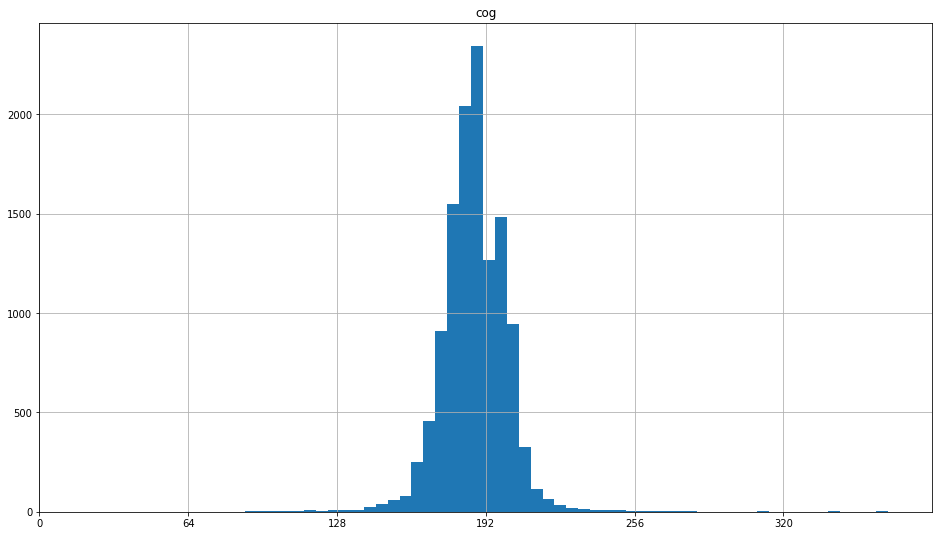

In [54]:
fig = plt.figure(figsize = (16,9))
ax = fig.gca()
major_ticks = np.arange(0, 384, 64)
ax.set_xticks(major_ticks)
ax.set_xlim([0,384])
ax.grid(which='both')
CLUSTERS.hist(column='cog', bins=64, ax=ax)
# CLUSTERS.groupby(['nclust']).describe()

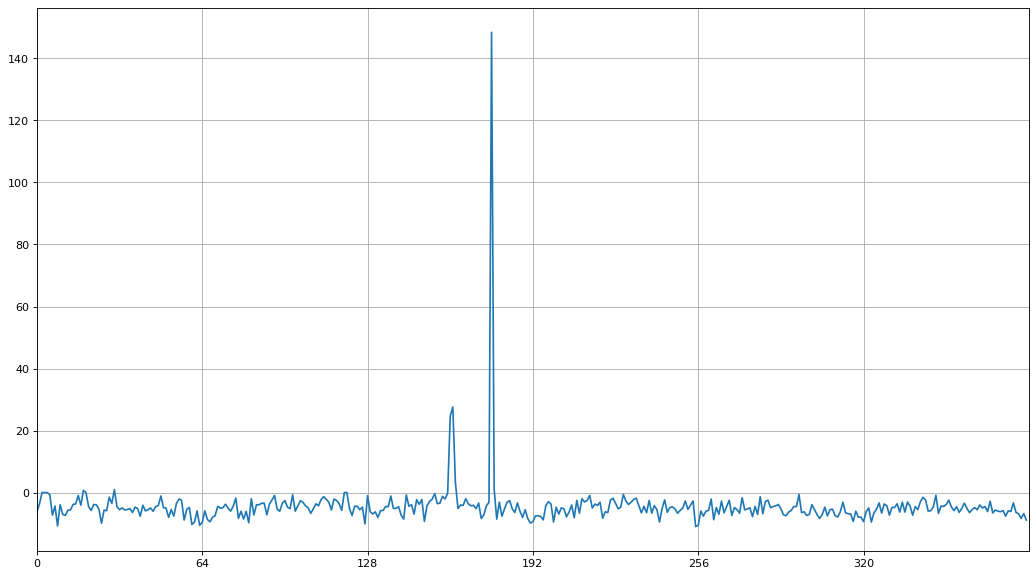

In [15]:
fig = plt.figure(num=None, figsize=(16, 9), dpi=80, facecolor='w', edgecolor='k')
ax = fig.gca()
major_ticks = np.arange(0, 384, 64)
ax.set_xticks(major_ticks)
ax.set_xlim([0,384])
ax.grid(which='both')
plt.plot(data[1])
plt.show()

In [14]:
data[0]

array([-3.1410e+00, -1.6560e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
        2.8400e-01, -3.2750e+00, -2.3490e+00, -4.7620e+00, -9.2600e-01,
       -3.0500e+00, -3.3540e+00, -3.6760e+00,  1.4010e+00, -5.8250e+00,
        1.3200e+00,  5.2000e-02, -2.0780e+00,  2.6880e+00,  0.0000e+00,
        1.5000e+00,  1.2060e+00, -8.5600e-01, -9.3800e-01, -3.3400e-01,
        1.1090e+00,  4.3240e+00,  1.1670e+00, -1.4730e+00, -2.5100e+00,
       -4.5000e-02,  4.4490e+00, -1.5350e+00,  4.0560e+00,  1.3780e+00,
        1.5230e+00,  8.2600e-01, -4.2700e-01,  3.1900e-01, -1.1800e+00,
       -6.5100e-01, -4.0950e+00, -9.0700e-01,  1.4210e+00,  3.0270e+00,
        9.4600e-01,  1.4760e+00, -1.9800e-01, -2.1050e+00, -2.8540e+00,
       -4.0160e+00, -2.0050e+00,  2.5360e+00, -6.0600e-01,  2.4860e+00,
       -2.0850e+00,  1.5090e+00, -8.5700e-01,  1.5430e+00, -1.7950e+00,
       -2.2920e+00,  2.4600e+00, -1.9240e+00, -7.5640e+00, -6.6670e+00,
       -1.8770e+00, -1.6790e+00, -1.4330e+00, -1.9190e+00, -4.36

array([2, 3, 4])

In [12]:
data[0][1]

324.0

In [161]:
#Common noise calculation

chip = 2
values = data[42][chip*64:(chip+1)*64]
mean = np.mean(values)
std  = np.std(values)

new_values_fast = values[(values < mean + std) & (values > mean - std)]
new_values_fixed = values[values < 50]

hard_cm = np.mean(values[8:23][values[8:23] < 50])
new_values_self = values[24:55][(values[24:55] < hard_cm + 10) & (values[24:55] > hard_cm - 10)]


fast_cn = np.mean(new_values_fast)
fixed_cn = np.mean(new_values_fixed)
self_cn = np.mean(new_values_self)

print('Mean: {0}'.format(mean))
print('Fast CN: {0}'.format(fast_cn))
print('Fixed CN: {0}'.format(fixed_cn))
print('Self tuning CN: {0}'.format(self_cn))

Mean: -2.7212812499999997
Fast CN: -5.255523809523809
Fixed CN: -5.255523809523809
Self tuning CN: -5.610935483870967
